# EDA - Text Fields (Title and content)

## Load packages and separate data

In [1]:
#package imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# load data
training_data = pd.read_json("train.json")

In [3]:
# isolate variables...
X_training_data = np.array(training_data.drop('requester_received_pizza', axis = 1))
print(X_training_data.shape)

# ...from labels
Y_training_data = np.array(training_data['requester_received_pizza'])
print(Y_training_data.shape)

(4040, 31)
(4040,)


In [4]:
print('Number of Pizzas in Training:', len(Y_training_data[Y_training_data == 1]))
print('Number of NO Pizzas in Training:', len(Y_training_data[Y_training_data == 0]))
print('Pizza Ratio =', len(Y_training_data[Y_training_data == 1])
                          / len(Y_training_data[Y_training_data == 0]))

Number of Pizzas in Training: 994
Number of NO Pizzas in Training: 3046
Pizza Ratio = 0.3263296126066973


## Title Data

In [5]:
x_training_data_title = np.array(training_data['request_title'])
print(x_training_data_title[0:10])

['Request Colorado Springs Help Us Please'
 '[Request] California, No cash and I could use some dinner'
 '[Request] Hungry couple in Dundee, Scotland would love some pizza!'
 '[Request] In Canada (Ontario), just got home from school. Need pizza.'
 '[Request] Old friend coming to visit. Would LOVE to feed her some dinner. Indiana'
 "[REQUEST] I'll give a two week xbox live code for a slice of pie!"
 '[Request] Help me give back to my roomies on Friday'
 'random acts of pizza, i have a request, if nothing, direct me to the correct sub please...'
 '[Request] Queensland Australia, Recently moved, little hungry :('
 "[REQUEST]We're in need of some om noms..."]


### Plot distribution of title word lengths

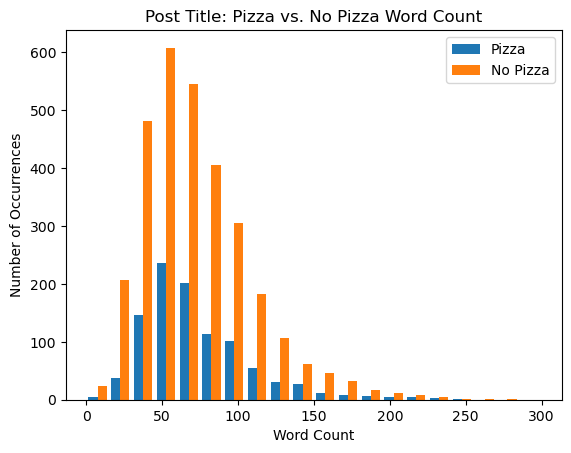

Shortest title - pizza: 7
Shortest title - no pizza: 7
Longest title - pizza: 250
Longest title - no pizza: 272
Average title length - pizza: 72.83702213279678
Average title length - no pizza: 71.5935653315824


In [6]:
# Create a list of lengths for training examples with a positive label.
title_lengths_pizza = [len(x) for (i, x) in enumerate(x_training_data_title) if Y_training_data[i]]

# And a list of lengths for training examples with a negative label.
title_lengths_no_pizza = [len(x) for (i, x) in enumerate(x_training_data_title) if not Y_training_data[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([title_lengths_pizza, title_lengths_no_pizza], bins=20, range=(0, 300),
         label=['Pizza', 'No Pizza'])
plt.xlabel('Word Count')
plt.ylabel('Number of Occurrences')
plt.title('Post Title: Pizza vs. No Pizza Word Count')
plt.legend()
plt.show()

# Check shortest, longest, and average title length
print('Shortest title - pizza:', min(title_lengths_pizza))
print('Shortest title - no pizza:', min(title_lengths_no_pizza))
print('Longest title - pizza:', max(title_lengths_pizza))
print('Longest title - no pizza:', max(title_lengths_no_pizza))
print('Average title length - pizza:', np.mean(title_lengths_pizza))
print('Average title length - no pizza:', np.mean(title_lengths_no_pizza))

### Wordclouds

In [7]:
# isolate pizza titles
titles_pizza = [x for (i, x) in enumerate(x_training_data_title) if Y_training_data[i]]

# isolate non pizza titles
titles_no_pizza = [x for (i, x) in enumerate(x_training_data_title) if not Y_training_data[i]]

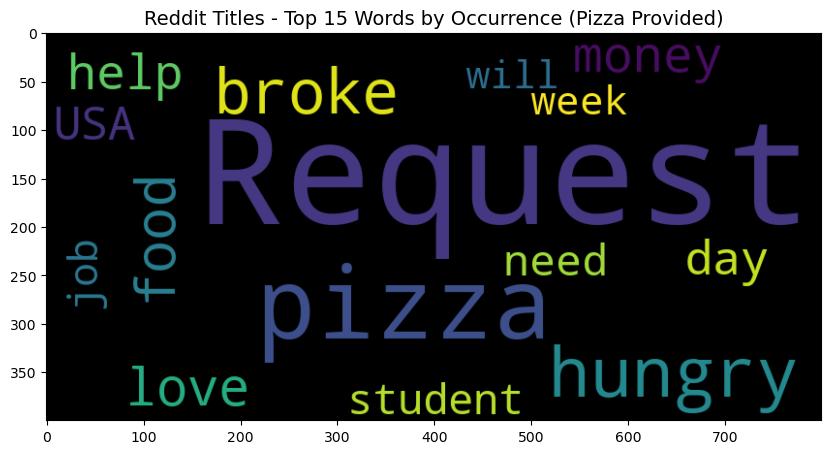

In [8]:
plt.figure(figsize = (10,10))
wc_title_pizza = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(titles_pizza))
plt.imshow(wc_title_pizza , interpolation = 'bilinear')
plt.title('Reddit Titles - Top 15 Words by Occurrence (Pizza Provided)',fontsize=14);

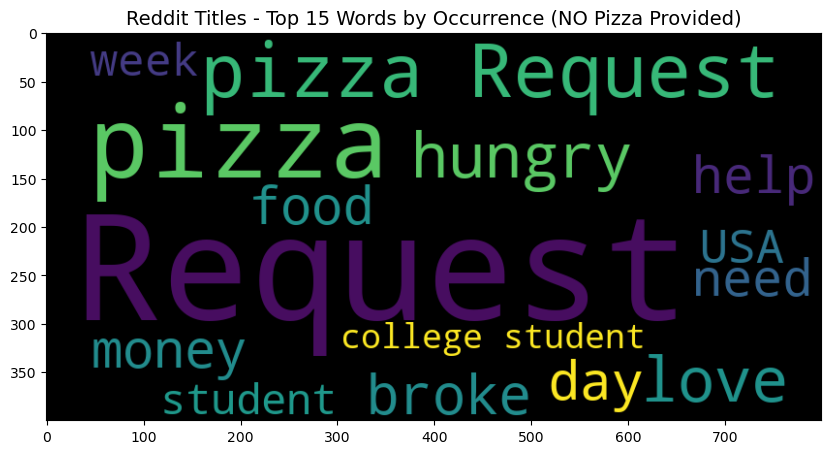

In [9]:
plt.figure(figsize = (10,10))
wc_title_no_pizza = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(titles_no_pizza))
plt.imshow(wc_title_no_pizza , interpolation = 'bilinear')
plt.title('Reddit Titles - Top 15 Words by Occurrence (NO Pizza Provided)',fontsize=14);

In [10]:
# items in no_pizza but not in pizza
print("items in no_pizza but not in pizza:: ", set(wc_title_no_pizza.words_.keys()) - set(wc_title_pizza.words_.keys()))

# items in pizza but not in no_pizza
print("items in no_pizza but not in pizza:: ", set(wc_title_pizza.words_.keys()) - set(wc_title_no_pizza.words_.keys()))

items in no_pizza but not in pizza::  {'pizza Request', 'college student'}
items in no_pizza but not in pizza::  {'will', 'job'}


### Look at counts of "request" in the titles

In [11]:
request_count_total = 0
for title in x_training_data_title:
    if 'request' in title.lower():
        request_count_total += 1
print(request_count_total / len(x_training_data_title))

0.9977722772277228


In [12]:
request_count_pizza = 0
for title in titles_pizza:
    if 'request' in title.lower():
        request_count_pizza += 1
print(request_count_pizza / len(titles_pizza))

0.9989939637826962


In [13]:
request_count_nopizza = 0
for title in titles_no_pizza:
    if 'request' in title.lower():
        request_count_nopizza += 1
print(request_count_nopizza / len(titles_no_pizza))

0.9973736047275115


### Look at counts of "pizza" in the titles

In [14]:
# entire dataset
pizza_count_total = 0
for title in x_training_data_title:
    if 'pizza' in title.lower():
        pizza_count_total += 1
print(pizza_count_total / len(x_training_data_title))

0.38564356435643565


In [15]:
# titles where pizza was provided
pizza_count_pizza = 0
for title in titles_pizza:
    if 'pizza' in title.lower():
        pizza_count_pizza += 1
print(pizza_count_pizza / len(titles_pizza))

0.35412474849094566


In [16]:
# titles where pizza was NOT provided
pizza_count_nopizza = 0
for title in titles_no_pizza:
    if 'pizza' in title.lower():
        pizza_count_nopizza += 1
print(pizza_count_nopizza / len(titles_no_pizza))

0.3959290873276428


### n_grams for titles

In [17]:
from sklearn.feature_extraction.text import CountVectorizer# Initialize CountVectorizer

vec = CountVectorizer(ngram_range = (2, 2))# Matrix of ngrams
bow = vec.fit_transform(x_training_data_title)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_total_title = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_total_title.columns = ["frequency", "ngram"]

ngram_freq_total_title['% total - all titles'] = ngram_freq_total_title['frequency'] / len(x_training_data_title)

ngram_freq_total_title.set_index('ngram')

ngram_freq_total_title

,frequency,ngram,% total - all titles
0,273,would love,0.067574
1,209,pizza for,0.051733
2,191,some pizza,0.047277
3,181,request pizza,0.044802
4,142,request broke,0.035149
...,...,...,...
21549,1,08 cents,0.000248
21550,1,02 in,0.000248
21551,1,00243364 in,0.000248
21552,1,000 depressed,0.000248


In [18]:
vec = CountVectorizer(ngram_range = (2, 2))# Matrix of ngrams
bow = vec.fit_transform(titles_pizza)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_pizza_title = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_pizza_title.columns = ["frequency", "ngram"]

ngram_freq_pizza_title['% total - pizza'] = ngram_freq_pizza_title['frequency'] / len(titles_pizza)

ngram_freq_pizza_title.set_index('ngram')

ngram_freq_pizza_title

,frequency,ngram,% total - pizza
0,59,would love,0.059356
1,56,request pizza,0.056338
2,56,pizza for,0.056338
3,37,pizza would,0.037223
4,36,request broke,0.036217
...,...,...,...
6970,1,11 after,0.001006
6971,1,106 degree,0.001006
6972,1,10 overdrawn,0.001006
6973,1,10 left,0.001006


In [19]:
vec = CountVectorizer(ngram_range = (2, 2))# Matrix of ngrams
bow = vec.fit_transform(titles_no_pizza)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_no_pizza_title = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_no_pizza_title.columns = ["frequency", "ngram"]

ngram_freq_no_pizza_title['% total - no pizza'] = ngram_freq_no_pizza_title['frequency'] / len(titles_no_pizza)

ngram_freq_no_pizza_title.set_index('ngram')

ngram_freq_no_pizza_title

,frequency,ngram,% total - no pizza
0,214,would love,0.070256
1,158,some pizza,0.051871
2,153,pizza for,0.050230
3,125,request pizza,0.041037
4,107,request just,0.035128
...,...,...,...
17261,1,08 cents,0.000328
17262,1,02 in,0.000328
17263,1,00243364 in,0.000328
17264,1,000 depressed,0.000328


In [20]:
# Merge the DataFrames
merged_ngrams = pd.merge(ngram_freq_total_title, ngram_freq_pizza_title, on='ngram').merge(ngram_freq_no_pizza_title, on='ngram')
merged_ngrams.drop(['frequency', 'frequency_x', 'frequency_y'], axis = 1)

merged_ngrams

,frequency_x,ngram,% total - all titles,frequency_y,% total - pizza,frequency,% total - no pizza
0,273,would love,0.067574,59,0.059356,214,0.070256
1,209,pizza for,0.051733,56,0.056338,153,0.050230
2,191,some pizza,0.047277,33,0.033199,158,0.051871
3,181,request pizza,0.044802,56,0.056338,125,0.041037
4,142,request broke,0.035149,36,0.036217,106,0.034800
...,...,...,...,...,...,...,...
2682,2,ab canada,0.000495,1,0.001006,1,0.000328
2683,2,72 hours,0.000495,1,0.001006,1,0.000328
2684,2,50 off,0.000495,1,0.001006,1,0.000328
2685,2,20 something,0.000495,1,0.001006,1,0.000328


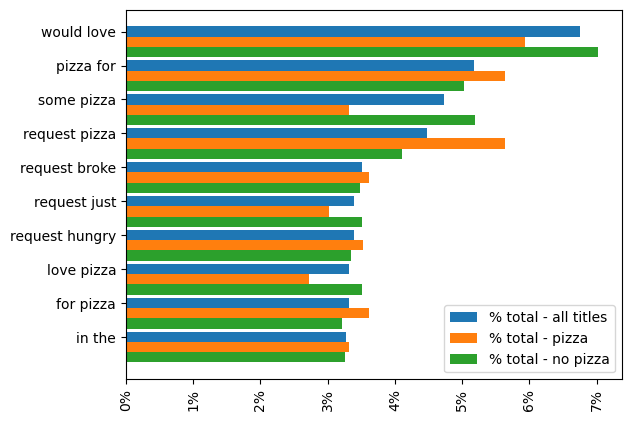

In [21]:
from matplotlib.ticker import FuncFormatter

# select the first 10 items to plot later
merged_ngrams_top_10 = merged_ngrams.head(10)

# set the 'ngram' column as the y_axis label
labels = merged_ngrams_top_10['ngram']

# select the columns we want plotted
columns_to_plot = ['% total - all titles', '% total - pizza', '% total - no pizza']

# create an array to hold the values from each of the columns_to_plot
values = np.array(merged_ngrams_top_10[columns_to_plot])

# set width of each bar
bar_width = 0.3

# calculate the position of each bar
bar_positions = np.arange(len(labels))

# plot the horizontal bar chart
for i, column in enumerate(columns_to_plot):
    plt.barh(bar_positions + i * bar_width, values[:, i], height = bar_width, label = column)

plt.yticks(bar_positions, labels)
plt.xticks(rotation=90)

formatter = FuncFormatter(lambda x, pos: '{:.0%}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.gca().invert_yaxis()

plt.legend()

plt.show()

### n_grams for content

In [22]:
x_training_data_post = np.array(training_data['request_text'])
print(x_training_data_post[10:])

["I've been unemployed but working odd jobs. I worked a job yesterday which I thought paid up front - it did not. Now I'm sitting at home dreaming of pizza (literally, I took a nap and dreamt there was pizza in my fridge, but woke up to nothing but leftover pasta). Will pay forward when I get a chance!"
 "Been a lurker for some time, figured I'd give it a shot. Nothing special about me. Just moved to San Francisco and don't know many people, so I figured I'd just stay in tonight and hope for some cheesy goodness. :)"
 "I am a stay at home mom of two kids i live with my husband his parents and my kids! The only reason that I am unemployed is because my husband was hit by a drunk driver a little over a year ago and was seriously injured and was almost killed! so i quit work to help him through recovery and take care of the kids while living with my in-laws off of their ssi checks (which are tiny)! Its the end of the month and we're broke! We are not starving but we aren't eating all that

In [23]:
vec = CountVectorizer(ngram_range = (3, 3))# Matrix of ngrams
bow = vec.fit_transform(x_training_data_post)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_total_posts = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_total_posts.columns = ["frequency", "ngram"]

ngram_freq_total_posts['% total - all posts'] = ngram_freq_total_posts['frequency'] / len(x_training_data_title)

ngram_freq_total_posts.set_index('ngram')

ngram_freq_total_posts

,frequency,ngram,% total - all posts
0,403,pay it forward,0.099752
1,237,http imgur com,0.058663
2,192,help me out,0.047525
3,177,be able to,0.043812
4,176,pizza would be,0.043564
...,...,...,...
210707,1,00 but today,0.000248
210708,1,00 block of,0.000248
210709,1,00 and told,0.000248
210710,1,00 and really,0.000248


In [24]:
# isolate pizza posts
posts_pizza = [x for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# isolate non pizza posts
posts_no_pizza = [x for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

In [25]:
vec = CountVectorizer(ngram_range = (3, 3))# Matrix of ngrams
bow = vec.fit_transform(posts_pizza)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_pizza_posts = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_pizza_posts.columns = ["frequency", "ngram"]

ngram_freq_pizza_posts['% total - pizza'] = ngram_freq_pizza_posts['frequency'] / len(titles_pizza)

ngram_freq_pizza_posts.set_index('ngram')

ngram_freq_pizza_posts

,frequency,ngram,% total - pizza
0,132,pay it forward,0.132797
1,108,http imgur com,0.108652
2,70,be able to,0.070423
3,58,to pay it,0.058350
4,55,help me out,0.055332
...,...,...,...
69927,1,00 pm est,0.001006
69928,1,00 period this,0.001006
69929,1,00 in my,0.001006
69930,1,00 dollars to,0.001006


In [26]:
vec = CountVectorizer(ngram_range = (3, 3))# Matrix of ngrams
bow = vec.fit_transform(posts_no_pizza)# Count frequency of ngrams
count_values = bow.toarray().sum(axis=0)# Create DataFrame from ngram frequencies
ngram_freq_no_pizza_posts = pd.DataFrame(sorted([(count_values[i], k) for k, i in vec.vocabulary_.items()], reverse = True))
ngram_freq_no_pizza_posts.columns = ["frequency", "ngram"]

ngram_freq_no_pizza_posts['% total - no pizza'] = ngram_freq_no_pizza_posts['frequency'] / len(titles_no_pizza)

ngram_freq_no_pizza_posts.set_index('ngram')

ngram_freq_no_pizza_posts

,frequency,ngram,% total - no pizza
0,271,pay it forward,0.088969
1,137,help me out,0.044977
2,129,pizza would be,0.042351
3,129,http imgur com,0.042351
4,115,would love to,0.037754
...,...,...,...
154098,1,00 even though,0.000328
154099,1,00 but today,0.000328
154100,1,00 block of,0.000328
154101,1,00 and told,0.000328


In [27]:
# Merge the DataFrames
merged_ngrams_posts = pd.merge(ngram_freq_total_posts, ngram_freq_pizza_posts, on='ngram').merge(ngram_freq_no_pizza_posts, on='ngram')
merged_ngrams_posts.drop(['frequency', 'frequency_x', 'frequency_y'], axis = 1, inplace=True)

merged_ngrams_posts

,ngram,% total - all posts,% total - pizza,% total - no pizza
0,pay it forward,0.099752,0.132797,0.088969
1,http imgur com,0.058663,0.108652,0.042351
2,help me out,0.047525,0.055332,0.044977
3,be able to,0.043812,0.070423,0.035128
4,pizza would be,0.043564,0.047284,0.042351
...,...,...,...,...
13318,12 hour shift,0.000495,0.001006,0.000328
13319,12 hour day,0.000495,0.001006,0.000328
13320,11 would love,0.000495,0.001006,0.000328
13321,10 hour shift,0.000495,0.001006,0.000328


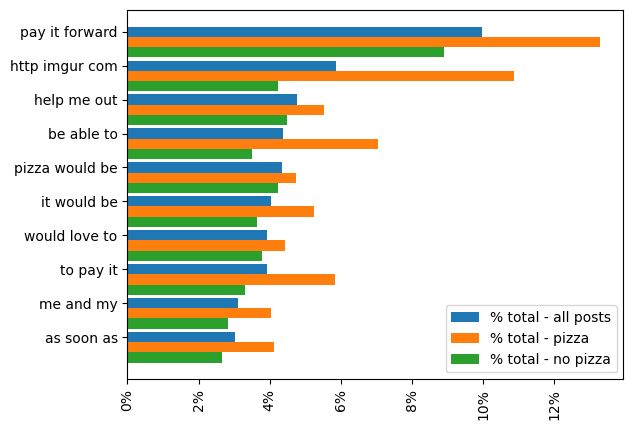

In [28]:
from matplotlib.ticker import FuncFormatter

merged_ngrams_posts_top_10 = merged_ngrams_posts.head(10)

labels = merged_ngrams_posts_top_10['ngram']

columns_to_plot = ['% total - all posts', '% total - pizza', '% total - no pizza']

values = np.array(merged_ngrams_posts_top_10[columns_to_plot])

bar_width = 0.3

bar_positions = np.arange(len(labels))

for i, column in enumerate(columns_to_plot):
    plt.barh(bar_positions + i * bar_width, values[:, i], height = bar_width, label = column)

plt.yticks(bar_positions, labels)
plt.xticks(rotation=90)

formatter = FuncFormatter(lambda x, pos: '{:.0%}'.format(x))
plt.gca().xaxis.set_major_formatter(formatter)

plt.gca().invert_yaxis()

plt.legend()

plt.show()

## Post data

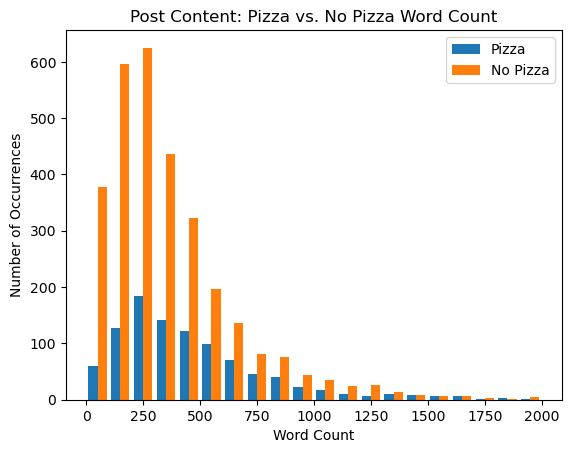

Shortest post - pizza: 0
Shortest post - no pizza: 0
Longest post - pizza: 4293
Longest post - no pizza: 4460
Average post length - pizza: 487.7354124748491
Average post length - no pizza: 378.3237032173342


In [29]:
## taken from HW9

# Create a list of lengths for training examples with a positive label.
text_lengths_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if Y_training_data[i]]

# And a list of lengths for training examples with a negative label.
text_lengths_no_pizza = [len(x) for (i, x) in enumerate(x_training_data_post) if not Y_training_data[i]]

# The histogram function can take a list of inputs and corresponding labels.
plt.hist([text_lengths_pizza, text_lengths_no_pizza], bins=20, range=(0, 2000),
         label=['Pizza', 'No Pizza'])
plt.title('Post Content: Pizza vs. No Pizza Word Count')
plt.xlabel('Word Count')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()

# Also check the longest reviews.
print('Shortest post - pizza:', min(text_lengths_pizza))
print('Shortest post - no pizza:', min(text_lengths_no_pizza))
print('Longest post - pizza:', max(text_lengths_pizza))
print('Longest post - no pizza:', max(text_lengths_no_pizza))
print('Average post length - pizza:', np.mean(text_lengths_pizza))
print('Average post length - no pizza:', np.mean(text_lengths_no_pizza))

In [30]:
posts_pizza[0:3]

["Feeling under the weather so I called out off work today! I hate requesting because I feel like I'm begging so I thought I'd give back! \n\n(I'd offer pizza if today were payday :C)",
 "Austin, Texas\n\nMy two roommates and I are hungry as hell. We were all sort of counting on the deposit from our last apartment to help us out, but they claimed there was damages, so we did not receive anything. So, we're sort of struggling. Is anyone able to help us out for dinner tonight? We'd really appreciate it!\n\nEDIT: Received a Dominos gift card from jetboyterp! THANK YOU!",
 "I've been unemployed but working odd jobs. I worked a job yesterday which I thought paid up front - it did not. Now I'm sitting at home dreaming of pizza (literally, I took a nap and dreamt there was pizza in my fridge, but woke up to nothing but leftover pasta). Will pay forward when I get a chance!"]

In [31]:
posts_no_pizza[0:3]

['Hi I am in need of food for my 4 children we are a military family that has really hit hard times and we have exahusted all means of help just to be able to feed my family and make it through another night is all i ask i know our blessing is coming so whatever u can find in your heart to give is greatly appreciated',
 'I spent the last money I had on gas today. Im broke until next Thursday :(',
 "My girlfriend decided it would be a good idea to get off at Perth bus station when she was coming to visit me and has since had to spend all her money on a taxi to get to me here in Dundee. Any chance some kind soul would get us some pizza since we don't have any cash anymore?"]

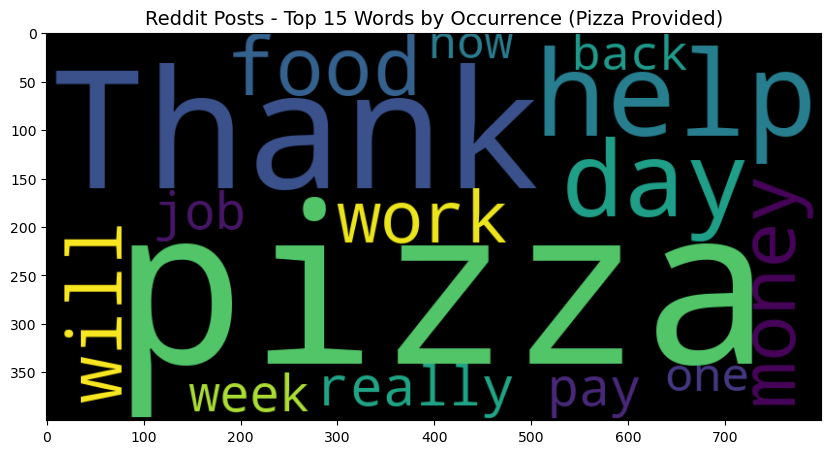

In [32]:
plt.figure(figsize = (10,10))
wc_post_pizza = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(posts_pizza))
plt.imshow(wc_post_pizza , interpolation = 'bilinear')
plt.title('Reddit Posts - Top 15 Words by Occurrence (Pizza Provided)',fontsize=14);

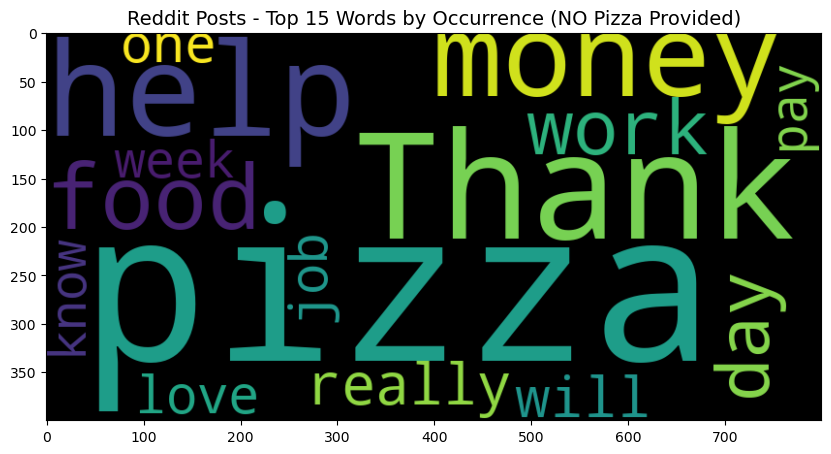

In [33]:
plt.figure(figsize = (10,10))
wc_post_no_pizza = WordCloud(
    max_words = 15,
    width = 800,
    height = 400).generate(" ".join(posts_no_pizza))
plt.imshow(wc_post_no_pizza , interpolation = 'bilinear')
plt.title('Reddit Posts - Top 15 Words by Occurrence (NO Pizza Provided)',fontsize=14);

In [34]:
# items in no_pizza but not in pizza
print("items in no_pizza but not in pizza:: ", set(wc_post_no_pizza.words_.keys()) - set(wc_post_pizza.words_.keys()))

# items in pizza but not in no_pizza
print("items in no_pizza but not in pizza:: ", set(wc_post_pizza.words_.keys()) - set(wc_post_no_pizza.words_.keys()))

items in no_pizza but not in pizza::  {'know', 'love'}
items in no_pizza but not in pizza::  {'now', 'back'}


### Look at counts of "thank" in the post content

In [35]:
#entire dataset
thank_count_total = 0
for post in x_training_data_post:
    if 'thank' in post.lower():
        thank_count_total += 1
print(thank_count_total / len(x_training_data_post))

0.3353960396039604


In [36]:
# posts where pizza was provided
thank_count_pizza = 0
for post in posts_pizza:
    if 'thank' in post.lower():
        thank_count_pizza += 1
print(thank_count_pizza / len(posts_pizza))

0.43762575452716296


In [37]:
# posts where pizza was NOT provided
thank_count_nopizza = 0
for post in posts_no_pizza:
    if 'thank' in post.lower():
        thank_count_nopizza += 1
print(thank_count_nopizza / len(posts_no_pizza))

0.3020354563361786


### Look at counts of "pizza" in the post content

In [38]:
#entire dataset
pizza_count_total = 0
for post in x_training_data_post:
    if 'pizza' in post.lower():
        pizza_count_total += 1
print(pizza_count_total / len(x_training_data_post))

0.6336633663366337


In [39]:
# posts where pizza was provided
pizza_count_pizza = 0
for post in posts_pizza:
    if 'pizza' in post.lower():
        pizza_count_pizza += 1
print(pizza_count_pizza / len(posts_pizza))

0.6659959758551308


In [40]:
# posts where pizza was NOT provided
pizza_count_nopizza = 0
for post in posts_no_pizza:
    if 'pizza' in post.lower():
        pizza_count_nopizza += 1
print(pizza_count_nopizza / len(posts_no_pizza))

0.6231122783978988


# Start looking at building our vocabulary to plot

In [41]:
import tensorflow_datasets as tfds
from collections import Counter
import tensorflow as tf

In [42]:
x_training_data_post_df = pd.DataFrame(x_training_data_post)
type(x_training_data_post_df)

pandas.core.frame.DataFrame

In [43]:
type(x_training_data_post)

numpy.ndarray

In [44]:
try:
    tokenizer = tfds.features.text.Tokenizer()
except AttributeError:
    tokenizer = tfds.deprecated.text.Tokenizer()

# create an instance of the Counter class
token_counts = Counter()

for example in x_training_data_post:
    tokens = tokenizer.tokenize(str(example))
    token_counts.update(tokens)
    
print('Size of training vocabulary:', len(token_counts))

Size of training vocabulary: 14900


In [45]:
# look at posts

print('Print second post in training data:')
print('------')
for idx, example in enumerate(x_training_data_post[:2]):
    if idx == 1:
        print(example)
        tokens = tokenizer.tokenize(str(example))

print('\nPrinting the first 10 tokens:')
print('------')
tokens = tokenizer.tokenize(str(x_training_data_post[0]))
[val for idx, val in enumerate(tokens) if idx < 12]


Print second post in training data:
------
I spent the last money I had on gas today. Im broke until next Thursday :(

Printing the first 10 tokens:
------


['Hi',
 'I',
 'am',
 'in',
 'need',
 'of',
 'food',
 'for',
 'my',
 '4',
 'children',
 'we']

In [46]:
# create an instance of the TF encoder class
try:
    encoder = tfds.features.text.TokenTextEncoder(token_counts) # token_counts contains our training vocabulary
except AttributeError:
    encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)

# try an example first (first 12 characters from the second review in training data)
example_str = 'I spent the last money I had on gas today. Im broke until next Thursday :('
encoder.encode(example_str) # the encode method transforms the text into integers

[2, 56, 57, 58, 59, 2, 60, 61, 62, 63, 64, 65, 66, 67, 68]